In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([-1, -0.7, -0.43, -0.14, 0.43])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.03])

In [8]:
n = len(x)
def design_matrix(x,n):
    A = np.zeros((len(x),n))
    for i in range(n):
        A[:,i] = x**i
    return A
A0 = design_matrix(x,3)


array([[ 1.    , -1.    ,  1.    ],
       [ 1.    , -0.7   ,  0.49  ],
       [ 1.    , -0.43  ,  0.1849],
       [ 1.    , -0.14  ,  0.0196],
       [ 1.    ,  0.43  ,  0.1849]])

In [9]:
t = np.linalg.solve(A0.T @ A0, A0.T @ y)


array([ 0.59359686, -0.10422885, -2.92634107])

In [10]:
sig = np.zeros(n)
for i in range(n):
    A0 = design_matrix(x,i+1)
    t = np.linalg.solve(A0.T @ A0, A0.T @ y)
    sig[i] = np.sum([(np.polyval(t, x[j]) - y[j])**2 for j in range(n)]) / (n - i)


array([ 0.959776  ,  5.77035877, 10.54036491, 15.31489736, 54.19635065])

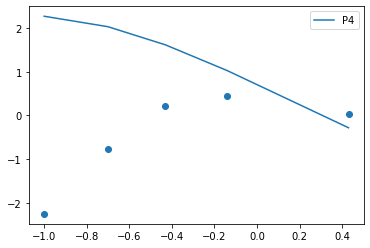

In [11]:
plt.scatter(x, y)
xp = np.linspace(-1, 3, 100)
A0 = design_matrix(x,4)
t = np.linalg.solve(A0.T @ A0, A0.T @ y)
plt.plot(x, np.polyval(t, x), label='P{}'.format(str(4)))

plt.legend()
plt.show()

In [12]:
m = 4
A = design_matrix(x,4)
Q, R = np.linalg.qr(A)
t = np.linalg.inv(R) @ Q.T @ y
t0 = np.linalg.solve(A.T @ A, A.T @ y)
print(t)
print(t0)
print(t-t0)

[ 0.49679123 -0.24058856 -2.29398284  0.70988817]
[ 0.49679123 -0.24058856 -2.29398284  0.70988817]
[ 2.10942375e-15  2.24820162e-15 -1.50990331e-14 -1.57651669e-14]
